In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
num_points = 10

In [4]:
data = {}
for num_dimensions in range(1, 20):
    data[num_dimensions] = np.random.uniform(low=0.0, high=1.0, size=(num_points, num_dimensions))

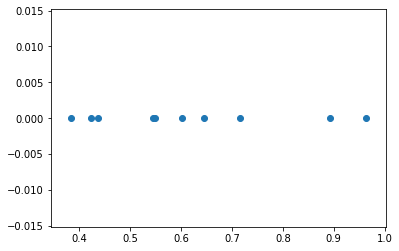

In [5]:
plt.scatter(data[1], np.zeros_like(data[1]))

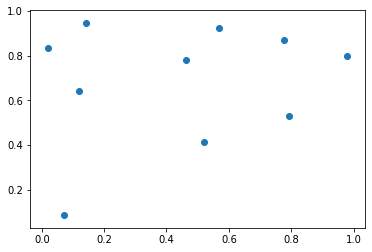

In [6]:
plt.scatter(data[2][:, 0], data[2][:, 1])

In [7]:
dist = {}
for num_dimensions in range(1, 20):
    dist[num_dimensions] = pd.DataFrame(euclidean_distances(data[num_dimensions], data[num_dimensions]))

In [8]:
mean_distances = pd.Series({num_dimensions: dist[num_dimensions].mean().mean() for num_dimensions in range(1, 20)})

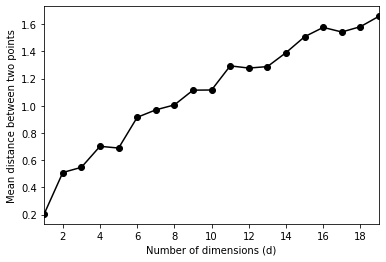

In [10]:
mean_distances.plot(style='ko-')
plt.xlabel("Number of dimensions (d)")
plt.ylabel("Mean distance between two points")
plt.savefig('curse_dist.pdf', transparent=True, bbox_inches="tight")

In [11]:
ratio_max_min = pd.Series({num_dimensions:(dist[num_dimensions].replace({0:np.NAN}).max()/dist[num_dimensions].replace({0:np.NAN}).min()).mean() 
                           for num_dimensions in range(1, 20) })

/home/shreyas/miniconda3/envs/grader/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


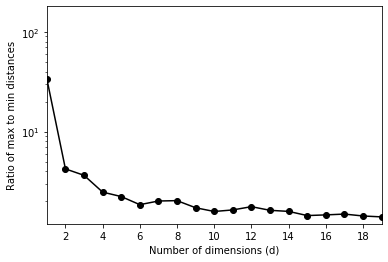

In [13]:
ratio_max_min.plot(logy=True, style='ko-')
plt.xlabel("Number of dimensions (d)")
plt.ylabel("Ratio of max to min distances")
plt.ylim((-1, 180))
plt.savefig('curse_spread.pdf', transparent=True, bbox_inches="tight")